<a href="https://colab.research.google.com/github/natrask/ENM1050/blob/main/roughClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 18.0 MB/s eta 0:00:00


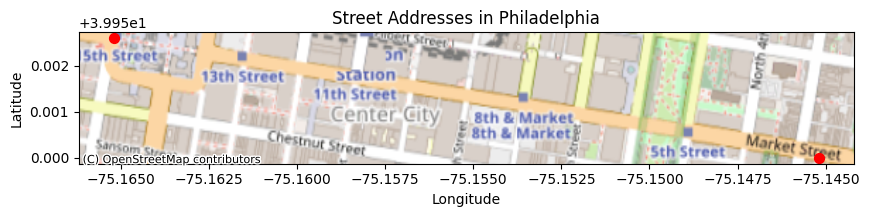

In [1]:
# prompt: superimpose a scatter plot of street addresses over a map of philadelphia

!pip install geopandas contextily

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Replace with your actual data
# Assuming you have a CSV file with 'address' and 'latitude', 'longitude' columns
data = pd.DataFrame({'address': ['123 Market St, Philadelphia, PA', '456 Walnut St, Philadelphia, PA'],
                     'latitude': [39.9526, 39.9500],
                     'longitude': [-75.1652, -75.1452]})

# Create a GeoDataFrame from your data
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude))
gdf.crs = 'EPSG:4326'  # Set the coordinate system to WGS 84

# Plot the map
ax = gdf.plot(figsize=(10, 10), markersize=50, color='red')

# Add a basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot (optional)
plt.title('Street Addresses in Philadelphia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [ ]:
# prompt: generate sample code introducing how to use pandas dataframes to a beginning python student

import pandas as pd

# Creating a DataFrame from a dictionary
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22],
        'City': ['New York', 'London', 'Paris']}
df = pd.DataFrame(data)

# Displaying the DataFrame
print(df)

# Accessing columns
print(df['Name'])  # Accessing the 'Name' column

# Accessing rows by index
print(df.loc[0])  # Accessing the first row

# Filtering data
print(df[df['Age'] > 25])  # Filtering rows where 'Age' is greater than 25

# Adding a new column
df['Country'] = ['USA', 'UK', 'France']
print(df)

# Some other useful methods:
print(df.describe())  # Summary statistics of numerical columns
print(df.head(2))  # Displaying the first 2 rows
print(df.tail(2))  # Displaying the last 2 rows

# You can explore more functions and features in the Pandas documentation.

In [6]:
import requests
import json

def get_lat_long(address):
  """
  Gets latitude and longitude coordinates from a given street address using the Google Maps Geocoding API.

  Args:
    address: The street address as a string.

  Returns:
    A tuple containing the latitude and longitude coordinates, or None if the address is not found.
  """

  api_key = "YOUR_GOOGLE_MAPS_API_KEY"  # Replace with your actual API key
  url = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={api_key}"

  response = requests.get(url)
  if response.status_code == 200:
    data = json.loads(response.text)
    if data['status'] == 'OK':
      location = data['results'][0]['geometry']['location']
      latitude = location['lat']
      longitude = location['lng']
      return (latitude, longitude)
    else:
      print(f"Error: {data['status']}")
  else:
    print(f"Error: {response.status_code}")

  return None

# Example usage:
address = "1600 Amphitheatre Parkway, Mountain View, CA 94043, USA"
coordinates = get_lat_long(address)

if coordinates:
  latitude, longitude = coordinates
  print(f"Latitude: {latitude}, Longitude: {longitude}")
else:
  print("Address not found.")

Error: REQUEST_DENIED
Address not found.


Okay, here's how you can find your Google Maps API key:

Steps:

Go to the Google Cloud Platform Console: Open your web browser and navigate to the Google Cloud Platform Console.

Select or Create a Project: If you have an existing project, select it from the dropdown menu. If not, create a new project by clicking on the "New Project" button.

Enable the Geocoding API: In the project dashboard, search for "Geocoding API" and click on it. Then, click on the "Enable" button to enable the API for your project.

Create Credentials: Go to the "Credentials" tab in the left-hand menu. Click on "Create Credentials" and select "API key."

Copy Your API Key: A dialog box will appear displaying your new API key. Copy it and store it securely.

Important Considerations:

link to survey: https://forms.gle/TZ5gedEEHYo9wGmB6

In [8]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [10]:
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1PNweaNkwxdmCo84-1duahGVg1uelcsSS0ZaL45EVIiY/edit?gid=1824420767#gid=1824420767'
sh = gc.open_by_url(spreadsheet_url)  # or gc.open_by_key(spreadsheet_key)
worksheet = sh.get_worksheet(0)

In [27]:
# Get all values from the worksheet as a list of lists
data = worksheet.get_all_values()
for entry in range(1,len(data)):
  lat_entry = data[entry][1]
  lon_entry = data[entry][2]
  if data[entry][3] == 'Dorm':
    label_entry = 1
  else:
    label_entry = 0

  print(lat_entry,lon_entry,label_entry)
# for response in range(1,data.s)
  # print(response)



39.95308 -75.19249 0
39.95205 -75.1979 0
39.95225 -75.19266 0
39.95366 -75.19132 1
39.95188 -75.20233 1
39.95232 -75.20021 1


take that data and use it to fill a pandas dataframe

In [61]:
import pandas as pd

# Create an empty DataFrame with specified column names
columns = ['latitude', 'longitude', 'survey_label']
df = pd.DataFrame(columns=columns)

# Get all values from the worksheet as a list of lists
data = worksheet.get_all_values()
for entry in range(1,len(data)):
  lat_entry = float(data[entry][1])
  lon_entry = float(data[entry][2])
  if data[entry][3] == 'Dorm':
    label_entry = 1
  else:
    label_entry = 0

  df.loc[len(df)] = [lat_entry, lon_entry, label_entry]

some examples of how easy it is to pull out latitude and longitude

In [62]:
df[['latitude','longitude']]
df[['latitude','longitude']].values #this pulls it out as a numpy array

array([[ 39.95308, -75.19249],
       [ 39.95205, -75.1979 ],
       [ 39.95225, -75.19266],
       [ 39.95366, -75.19132],
       [ 39.95188, -75.20233],
       [ 39.95232, -75.20021]])

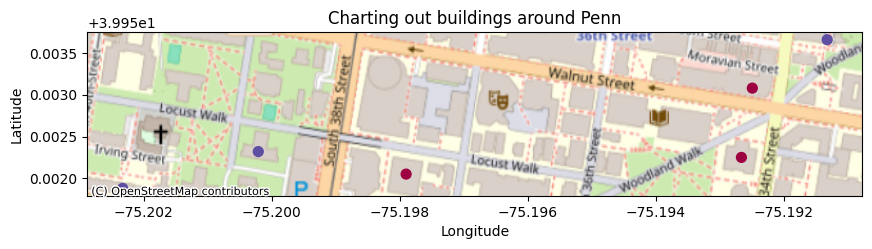

In [63]:
# prompt: superimpose a scatter plot of street addresses over a map of philadelphia

# !pip install geopandas contextily

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Replace with your actual data
# Assuming you have a CSV file with 'address' and 'latitude', 'longitude' columns
data = df

# Create a GeoDataFrame from your data
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude))
gdf.crs = 'EPSG:4326'  # Set the coordinate system to WGS 84

# Plot the map
# ax = gdf.plot(figsize=(10, 10), markersize=50, color='red')
ax = gdf.plot(figsize=(10, 10), markersize=50, column='survey_label', cmap = 'Spectral', legend=False)

# Add a basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot (optional)
plt.title('Charting out buildings around Penn')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [64]:
df[['latitude', 'longitude']].values

array([[ 39.95308, -75.19249],
       [ 39.95205, -75.1979 ],
       [ 39.95225, -75.19266],
       [ 39.95366, -75.19132],
       [ 39.95188, -75.20233],
       [ 39.95232, -75.20021]])

In [106]:
# prompt: load latitude and longitude into pytorch tensor
import numpy as np
import torch

# Assuming your DataFrame 'df' has 'latitude' and 'longitude' columns
X_in = torch.tensor(df[['latitude', 'longitude']].values,dtype=torch.float32)
y_data = torch.tensor(df['survey_label'].values)

# Rescale X_in to [0,1]
datamin = X_in.min(dim=0)[0]
datamax = X_in.max(dim=0)[0]
X_in = (X_in - datamin) / (datamax - datamin)

#convert to one-hot encoding, considering we have 2 classes
y_data_onehot = torch.zeros(y_data.shape[0],2)
y_data_onehot[torch.arange(y_data.shape[0]),y_data.long()] = 1

print("Latitude Tensor:", X_in)
print("Longitude Tensor:", X_out)
print('One hot of classes:', y_data_onehot)

Latitude Tensor: tensor([[0.6738, 0.8940],
        [0.0944, 0.4026],
        [0.2082, 0.8787],
        [1.0000, 1.0000],
        [0.0000, 0.0000],
        [0.2468, 0.1927]])
Longitude Tensor: tensor([0, 0, 0, 1, 1, 1], dtype=torch.int32)
One hot of classes: tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])


In [107]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms # This is a library holding a bunch of datasets
from torch.utils.data import DataLoader

class dorm_ClassificationMLP(nn.Module):
    def __init__(self):
        super(dorm_ClassificationMLP, self).__init__()
        self.Nneurons = 10                        # **ten** internal neurons
        self.hidden = nn.Linear(2, self.Nneurons) # **two** input neurons
        self.relu = nn.ReLU()
        self.hidden2 = nn.Linear(self.Nneurons, self.Nneurons) # **ten** input to **ten** output
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(self.Nneurons, 2) # **two** output neurons
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        return self.softmax(self.output(self.relu2(self.hidden2(self.relu(self.hidden(x))))))

In [108]:
#Initialize the model
model = dorm_ClassificationMLP()

# Define the loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [114]:

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_out = model(X_in)
    loss = criterion(y_out, y_data_onehot)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch:', epoch, 'Loss:', loss.item())

Epoch: 0 Loss: 0.31423985958099365
Epoch: 100 Loss: 0.31409719586372375
Epoch: 200 Loss: 0.3139840066432953
Epoch: 300 Loss: 0.3138919174671173
Epoch: 400 Loss: 0.3138161599636078
Epoch: 500 Loss: 0.31375330686569214
Epoch: 600 Loss: 0.3137001693248749
Epoch: 700 Loss: 0.3136551082134247
Epoch: 800 Loss: 0.31361615657806396
Epoch: 900 Loss: 0.31358256936073303


In [117]:
with torch.no_grad():
    y_out = model(X_in)
    for i in range(X_in.shape[0]):
        print('(predicted probability/true probability): ',y_out[i,:].detach().numpy(),y_data_onehot[i,:].detach().numpy())


(predicted probability/true probability):  [0.998931   0.00106899] [1. 0.]
(predicted probability/true probability):  [0.998931   0.00106899] [1. 0.]
(predicted probability/true probability):  [0.998931   0.00106899] [1. 0.]
(predicted probability/true probability):  [2.1025984e-05 9.9997902e-01] [0. 1.]
(predicted probability/true probability):  [1.2990318e-05 9.9998701e-01] [0. 1.]
(predicted probability/true probability):  [9.310662e-06 9.999907e-01] [0. 1.]


In [184]:
x_min, x_max = X_in[:, 0].min() - 0.2, X_in[:, 0].max() + 0.2
y_min, y_max = X_in[:, 1].min() - 0.2, X_in[:, 1].max() + 0.2

#generate a grid of points between min and max
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
X_grid = torch.stack([xx.flatten(), yy.flatten()], 1)

#calculate the model output for the grid
with torch.no_grad():
    y_out = model(X_grid)
    y_out = torch.argmax(y_out, dim=1)

#plot the decision boundary
# plt.contourf(xx, yy, y_out.view(100, 100), alpha=0.5)
# plt.scatter(x_data[Y_flowers==0][:,0],x_data[Y_flowers==0][:,1],label='Iris Setosa')
# plt.scatter(x_data[Y_flowers==1][:,0],x_data[Y_flowers==1][:,1],label='Iris Versicolour')
# plt.scatter(x_data[Y_flowers==2][:,0],x_data[Y_flowers==2][:,1],label='Iris Virginica')
# plt.legend()
# plt.xlabel('Petal length')
# plt.ylabel('Petal width')
# plt.show()

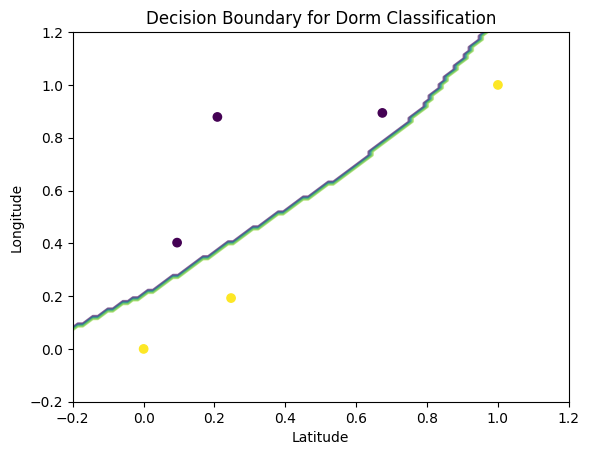

In [127]:
# prompt: generate a contour plot from above block

import matplotlib.pyplot as plt

# Assuming X_in is your input data (latitude, longitude) and y_out is the predicted class
# You'll need to reshape y_out to match the grid size (e.g., 100x100)

# Create a contour plot
plt.contour(xx.numpy(), yy.numpy(), y_out.view(100, 100).numpy(), alpha=0.5)

# Add scatter plot of the data points (optional)
plt.scatter(X_in[:, 0].numpy(), X_in[:, 1].numpy(), c=y_data.numpy(), cmap='viridis')

# Add labels and title (optional)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Decision Boundary for Dorm Classification')

plt.show()

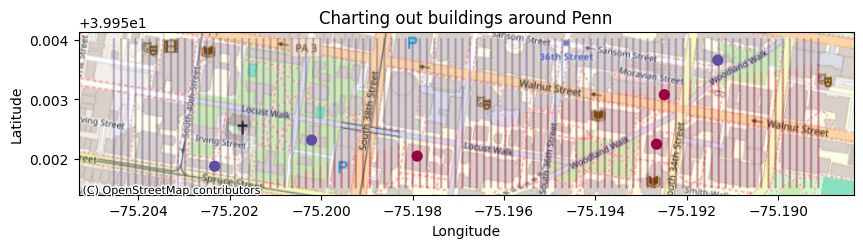

In [153]:

# Replace with your actual data
# Assuming you have a CSV file with 'address' and 'latitude', 'longitude' columns
data = df
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude))
gdf.crs = 'EPSG:4326'  # Set the coordinate system to WGS 84

# Plot the map
# ax = gdf.plot(figsize=(10, 10), markersize=50, color='red')
# ax = gdf.plot(figsize=(10, 10), markersize=50, column='survey_label', cmap = 'Spectral', legend=False)

#Rescale the data back into lat/long coordinates and plot
scaledX = X_grid[:,0]*(datamax[0]-datamin[0])+datamin[0]
scaledY = X_grid[:,1]*(datamax[1]-datamin[1])+datamin[1]
contour_data = pd.DataFrame({'latitude': scaledX, 'longitude': scaledY, 'prediction': y_out.numpy()})
contour_gdf = gpd.GeoDataFrame(
    contour_data, geometry=gpd.points_from_xy(contour_data.longitude, contour_data.latitude))
contour_gdf.crs = 'EPSG:4326'

# # Plot the map with the contour plot superimposed
ax = contour_gdf.plot(figsize=(10,10), markersize=1, column='prediction', cmap='Spectral', alpha=0.2, legend=False)
gdf.plot(ax=ax, markersize=50, column='survey_label', cmap='Spectral', legend=False)
# ax = gdf.plot(figsize=(10, 10), markersize=50, column='survey_label', cmap='Spectral', legend=False)
# contour_gdf.plot(ax=ax, markersize=1, column='prediction', cmap='viridis', alpha=0.5)

# # Add a basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# # Customize plot (optional)
plt.title('Charting out buildings around Penn')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [173]:
scaledxx

tensor([[39.9515, 39.9515, 39.9515,  ..., 39.9515, 39.9515, 39.9515],
        [39.9515, 39.9515, 39.9515,  ..., 39.9515, 39.9515, 39.9515],
        [39.9516, 39.9516, 39.9516,  ..., 39.9516, 39.9516, 39.9516],
        ...,
        [39.9540, 39.9540, 39.9540,  ..., 39.9540, 39.9540, 39.9540],
        [39.9540, 39.9540, 39.9540,  ..., 39.9540, 39.9540, 39.9540],
        [39.9540, 39.9540, 39.9540,  ..., 39.9540, 39.9540, 39.9540]])

[39.95308 39.95205 39.95225 39.95366 39.95188 39.95232]


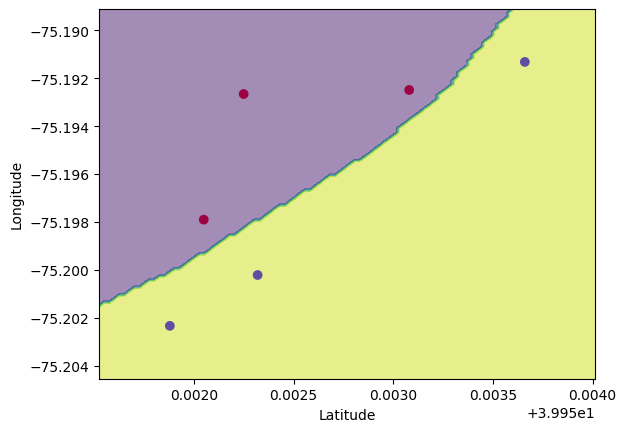

In [230]:
# Generate contours of decision boundary
scaledxx = (xx*(datamax[0]-datamin[0])+datamin[0]).numpy()
scaledyy = (yy*(datamax[1]-datamin[1])+datamin[1]).numpy()
plt.contourf(scaledxx, scaledyy, y_out.view(100, 100).numpy(), alpha=0.5)

print(data['latitude'].values)
plt.scatter(data['latitude'].values, data['longitude'].values, c=y_data.numpy(), cmap='Spectral')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


In [208]:
scaledyy.min()

-75.20454